In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('pima-indians-diabetes.csv')

In [ ]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data.tail()

,6,148,72,35,0,33.6,0.627,50,1
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

,0
6,0
148,0
72,0
35,0
0,0
33.6,0
0.627,0
50,0
1,0


In [ ]:
data.dtypes

,0
6,int64
148,int64
72,int64
35,int64
0,int64
33.6,float64
0.627,float64
50,int64
1,int64


In [ ]:
data.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

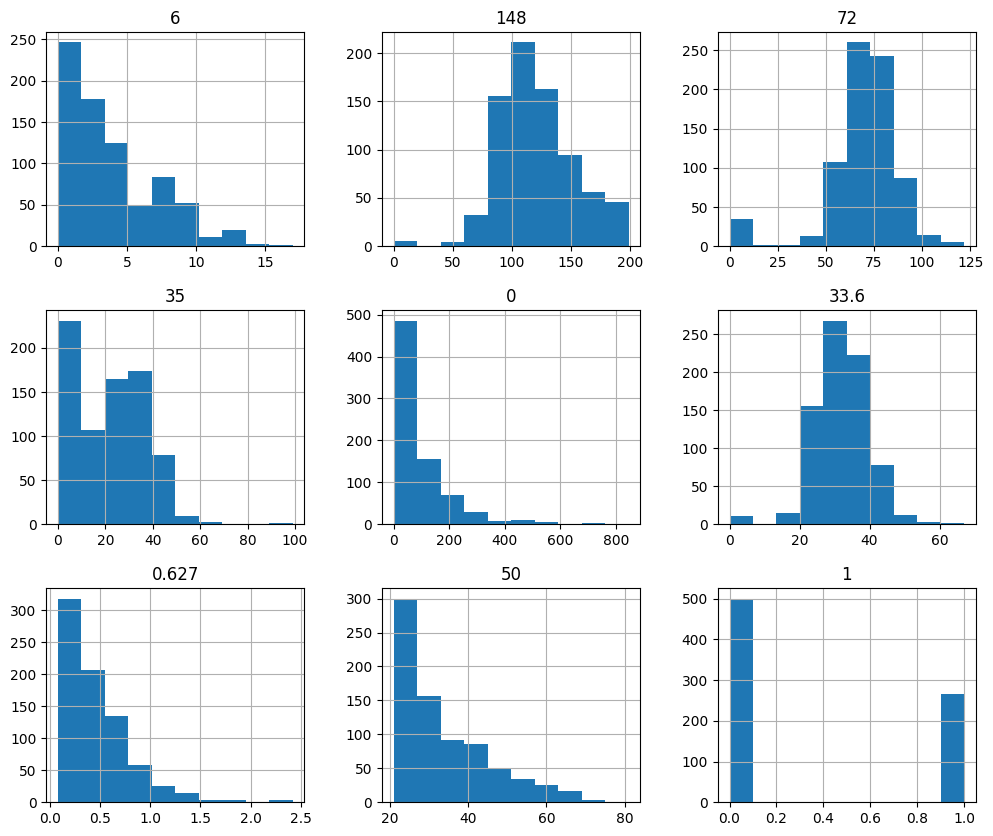

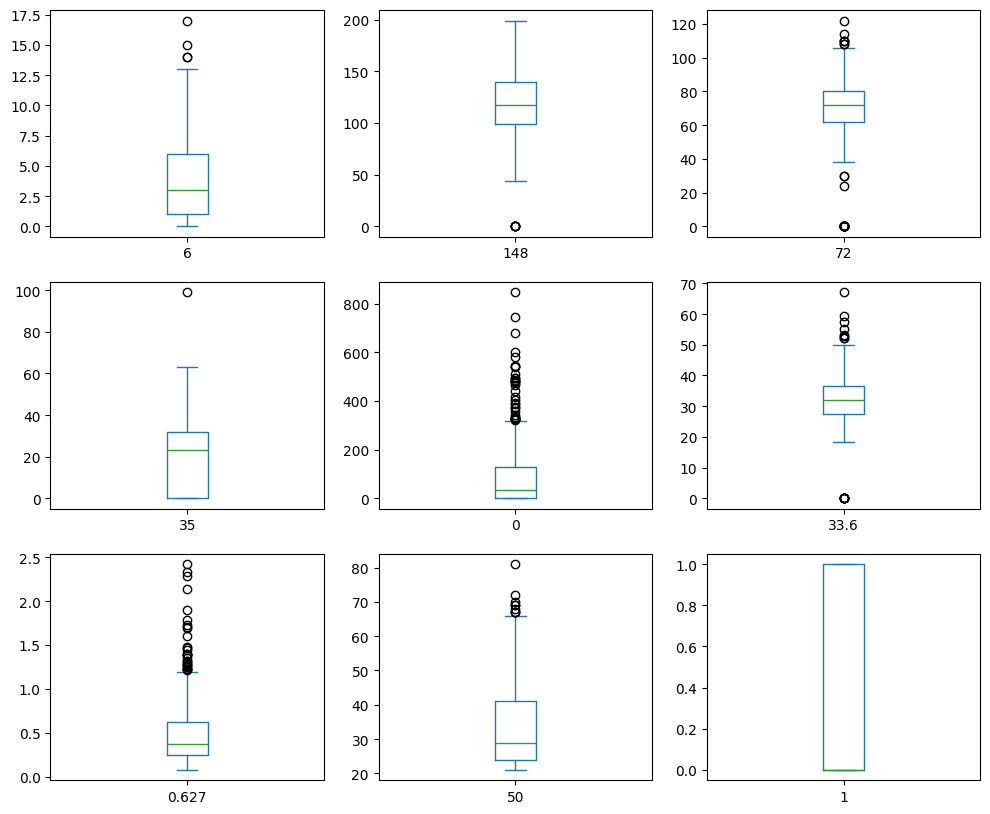

In [ ]:
# prompt: Data Visualization:
# Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
# Analyze any patterns or correlations observed in the data.

# Histograms for each numerical feature
data.hist(figsize=(12, 10))
plt.show()

# Box plots for each numerical feature
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,10))
plt.show()



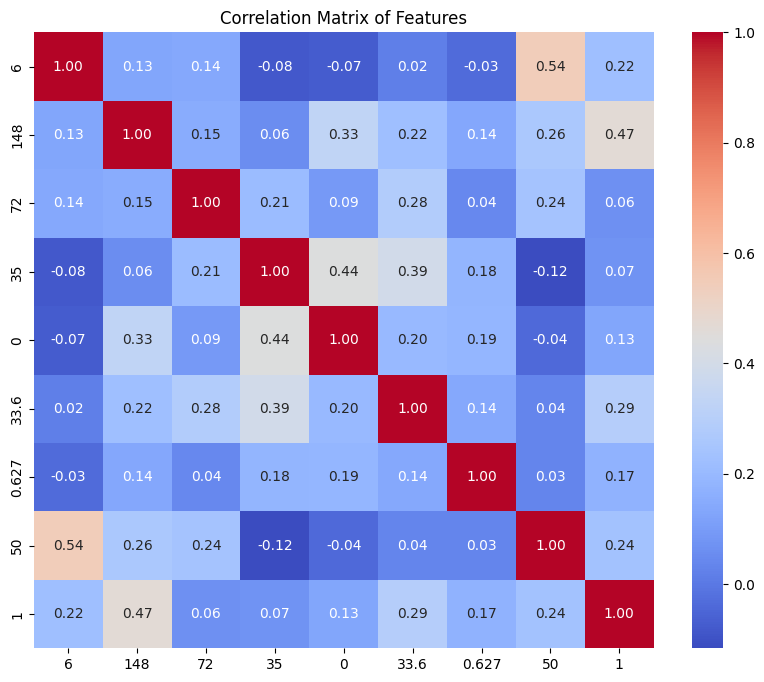

In [ ]:
#


# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

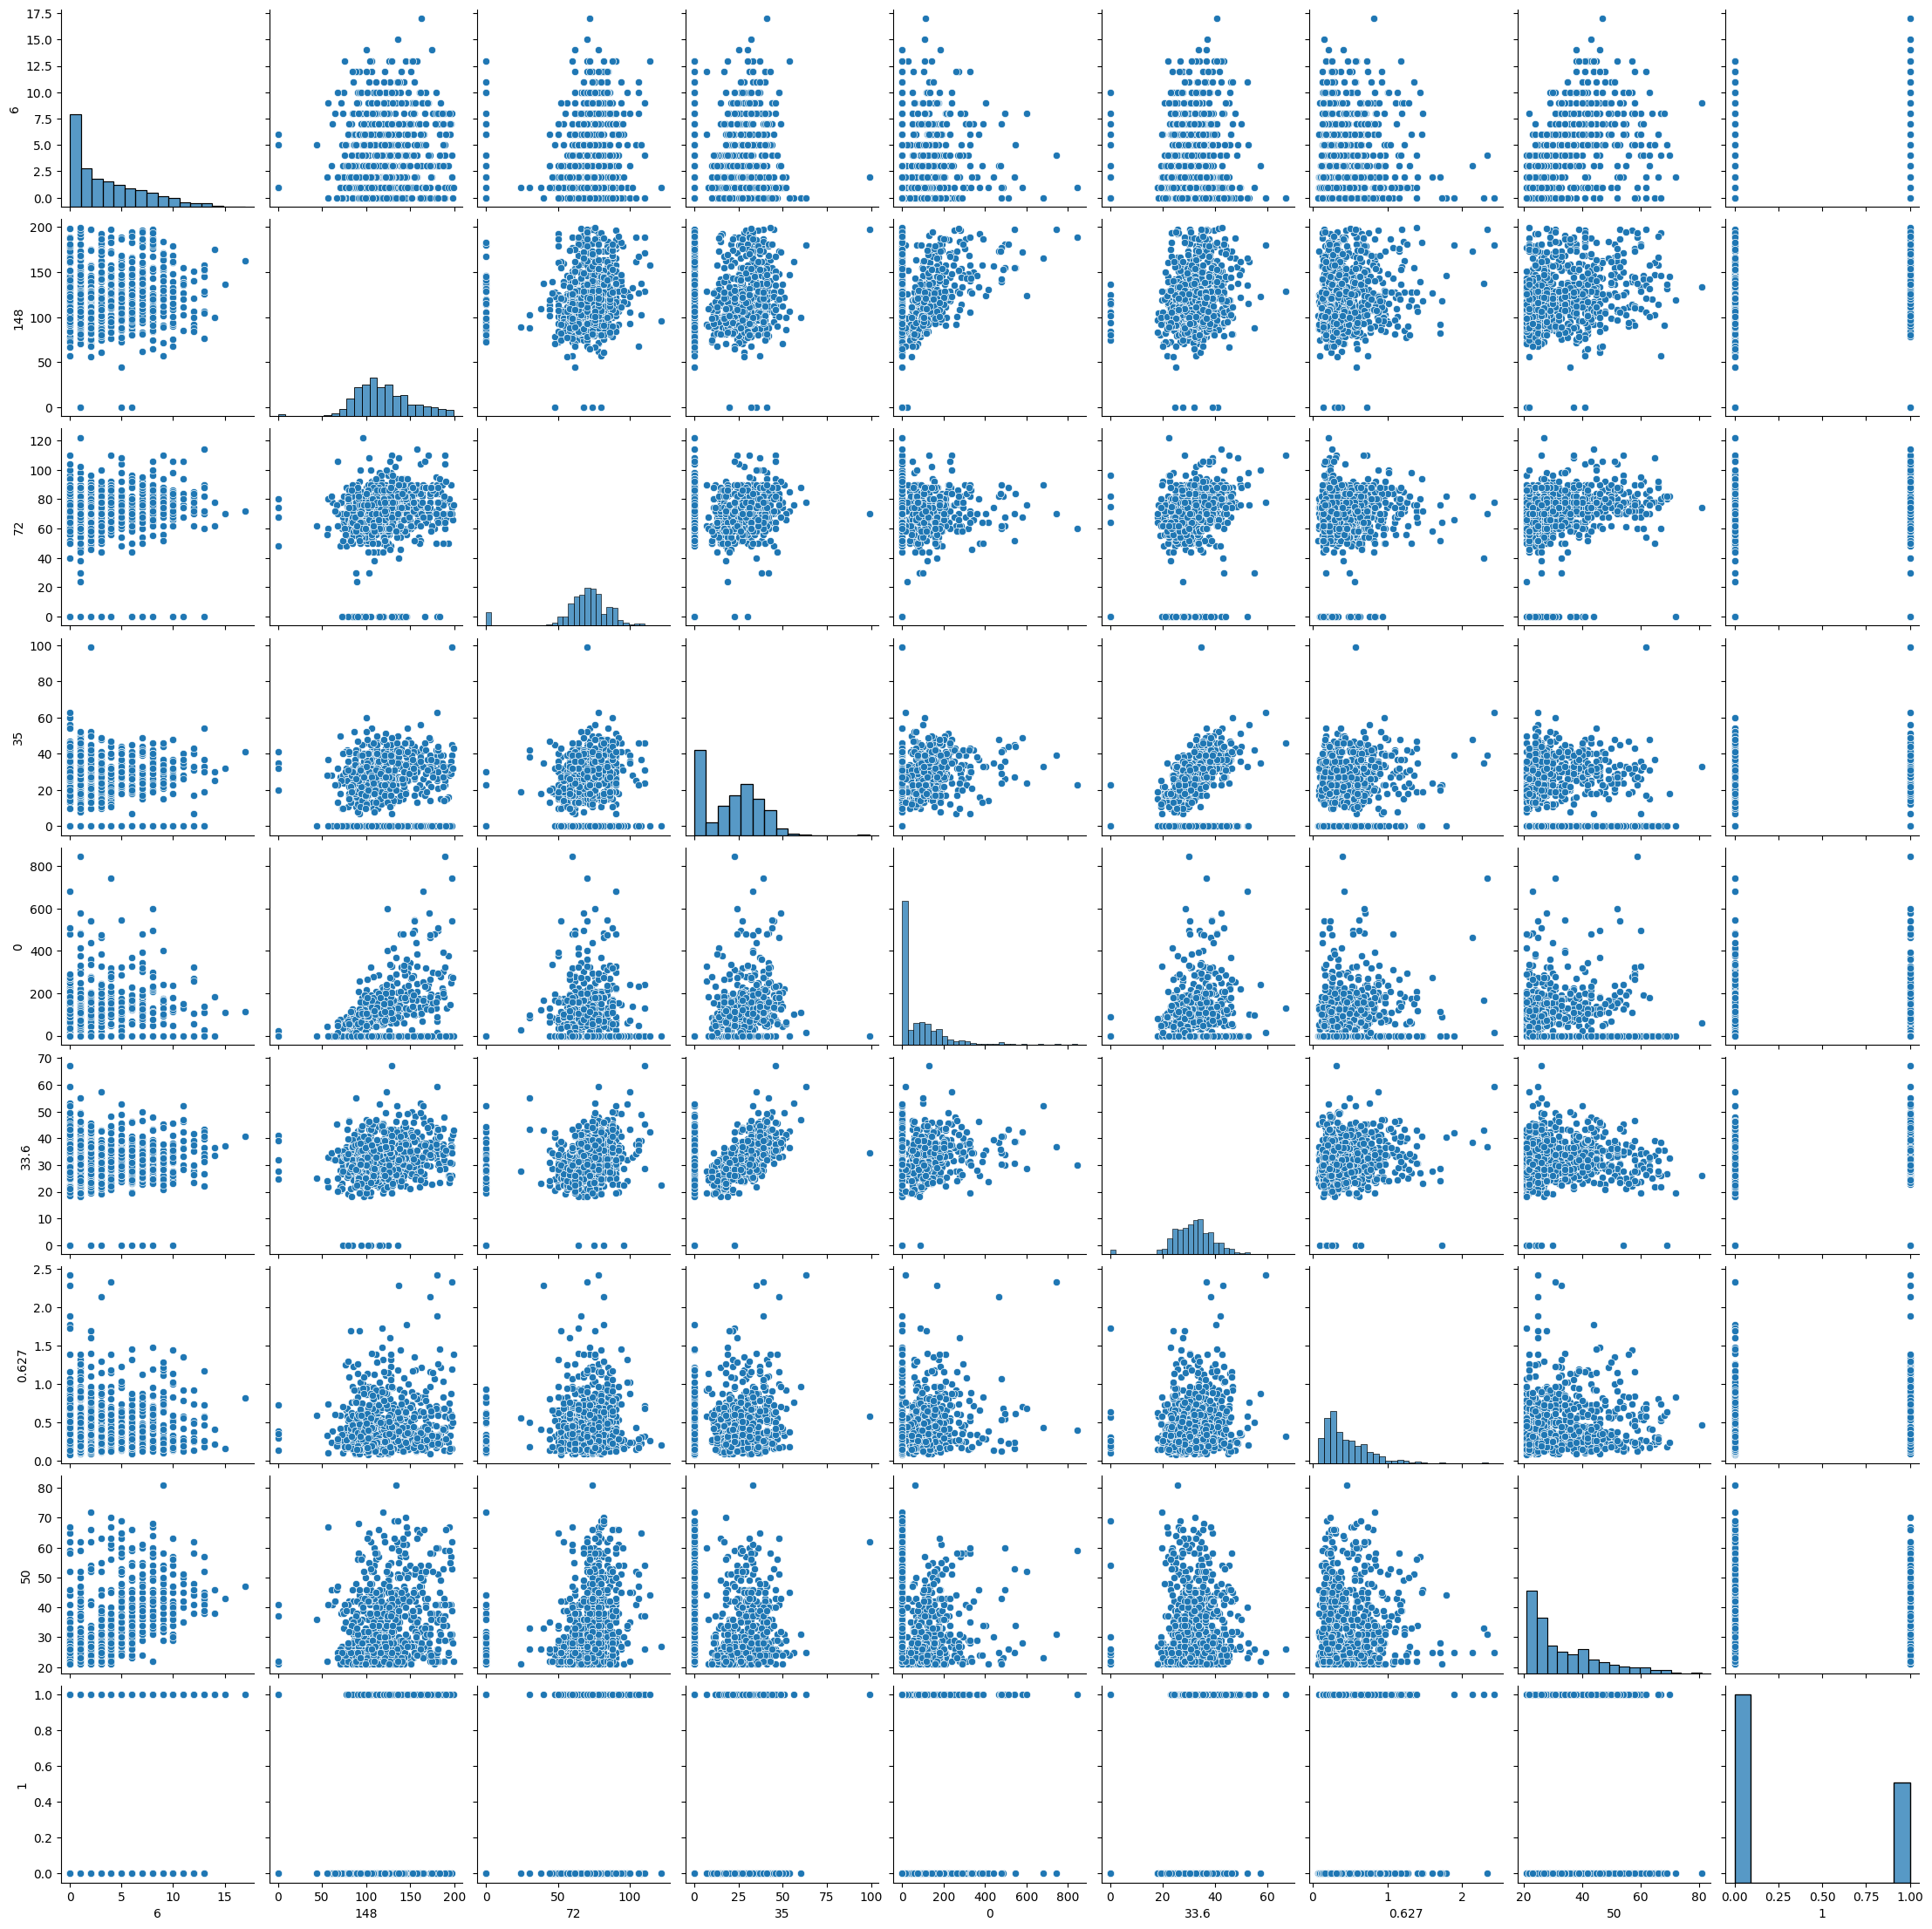

In [ ]:
# Pair plot to visualize relationships between features
# Check if 'Outcome' is the correct column name.
# If not, replace with the actual column name from your data.
# For example, if the column name is 'diabetes', use:
# sns.pairplot(data, hue='diabetes', diag_kind='kde')
sns.pairplot(data)

In [ ]:
# Step 3: Data Preprocessing
# Check for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_columns}")

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

Categorical Columns: Index([], dtype='object')


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [118]:
# Assuming 'Outcome' is the actual target variable column name
# Assuming 'Outcome' is the actual target variable column name,
# verify the actual column name in your dataframe and replace 'Outcome'
# if necessary
# You can check the column names using: print(data.columns)
print(data.columns) # Print the column names to identify the target variable

# If the target variable column is named differently (e.g., 'diabetes'),
# replace 'Outcome' with the correct name in the following lines:
X = data.drop(columns=[data.columns[-1]])  # Drop the last column (assuming it's the target)
y = data[data.columns[-1]]  # Assign the last column as the target variable

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')


In [121]:
# Handling imbalance using SMOTE
smote = SMOTE(random_state=42)
# Scale the features using StandardScaler
# Assuming 'X' contains your features data
features_scaled = scaler.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(features_scaled,y)


In [122]:
# 4. Random Forest Model Implementation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [124]:
# Evaluate Model
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# Evaluate Model
y_pred = rf_model.predict(X_test)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Metrics:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
[[119  33]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       152
           1       0.80      0.87      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [127]:
!pip install scikit-learn --upgrade


In [132]:
 #Bagging and Boosting Methods
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

# Bagging with Random Forest
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bagging_model.fit(X_train, y_train)
y_bagging_pred = bagging_model.predict(X_test)
print("\nBagging Metrics:")
print(classification_report(y_test, y_bagging_pred))

# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_boosting_pred = boosting_model.predict(X_test)
print("\nBoosting Metrics:")
print(classification_report(y_test, y_boosting_pred))

# Comparing Results (You can add more detailed comparisons)
print("\nComparing Bagging and Boosting:")
print(f"Bagging Accuracy: {accuracy_score(y_test, y_bagging_pred):.2f}")
print(f"Boosting Accuracy: {accuracy_score(y_test, y_boosting_pred):.2f}")



Bagging Metrics:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       152
           1       0.80      0.89      0.84       148

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300


Boosting Metrics:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       152
           1       0.77      0.83      0.80       148

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300


Comparing Bagging and Boosting:
Bagging Accuracy: 0.83
Boosting Accuracy: 0.79
